# Comp4331 Assignment 1

## Preparing the dataset

In [5]:
!echo ">> 1. remove old data if exists."
![ -e "student-por.csv" ] && rm "student-por.csv"
!echo ">> 2. download data from UCI."
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
!echo ">> 3. unzip the data."
!unzip student.zip
!echo ">> 4. remove unnecessary files."
!rm "student.zip" "student-mat.csv" "student-merge.R" "student.txt"
!echo ">> 5. finished!"

">> 1. remove old data if exists."


'[' is not recognized as an internal or external command,
operable program or batch file.


">> 2. download data from UCI."


--2021-10-18 01:38:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: 'student.zip.1'

     0K .......... .........                                  100% 97.7K=0.2s

2021-10-18 01:38:03 (97.7 KB/s) - 'student.zip.1' saved [20478/20478]



">> 3. unzip the data."


'unzip' is not recognized as an internal or external command,
operable program or batch file.


">> 4. remove unnecessary files."


'rm' is not recognized as an internal or external command,
operable program or batch file.


">> 5. finished!"


In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn

In [5]:
data_file = r"C:\Users\kkaus\OneDrive - HKUST Connect\Courses\Year 3\COMP 4331\Coding Folder\Assignments\Assignment 1\data\student-por.csv"

In [6]:
data_df = pd.read_csv(data_file, sep=';')

In [24]:
data_df.shape

(649, 33)

In [7]:
data_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


## Task 1. Basic summary

In [15]:
# Age attribute

age_mean = data_df['age'].mean()
age_median = data_df['age'].median()
age_mode = data_df['age'].mode()

print("Age mean:", age_mean)
print("Age median:", age_median)
print("Age mode:", age_mode)

data_df['age'].describe()

Age mean: 16.7442218798151
Age median: 17.0
Age mode: 0    17
dtype: int64


count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [16]:
# G1 attribute

G1_mean = data_df['G1'].mean()
G1_median = data_df['G1'].median()
G1_mode = data_df['G1'].mode()

print("G1 mean:", G1_mean)
print("G1 median:", G1_median)
print("G1 mode:", G1_mode)

data_df['G1'].describe()

# put in one cell, find a better way to display 5 number count

G1 mean: 11.399075500770415
G1 median: 11.0
G1 mode: 0    10
dtype: int64


count    649.000000
mean      11.399076
std        2.745265
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

## Task 2. Box plot

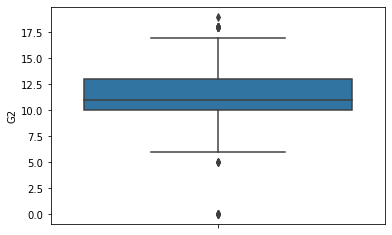

In [18]:
# G2 Boxplot

sns.boxplot(data=data_df, y="G2");

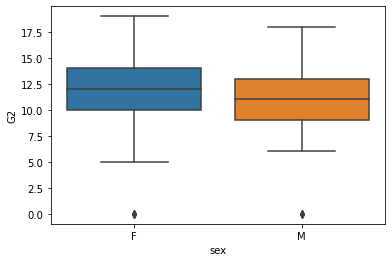

In [19]:
# G2 Boxplot and Sex

sns.boxplot(data=data_df, y="G2", x='sex');


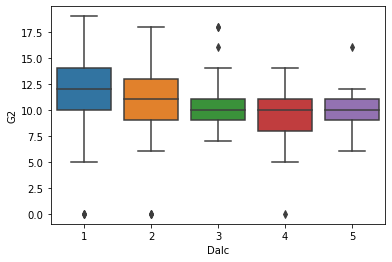

In [20]:
# G2 Boxplot and Alcohol Consumption

sns.boxplot(data=data_df, y="G2", x='Dalc');

#combine all histograms and add titles


## Task 3. Hist plot

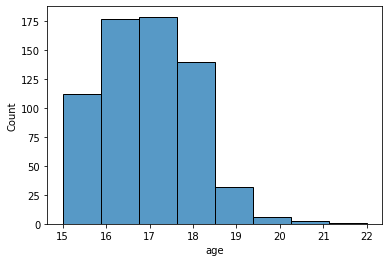

In [21]:
# Age histogram

sns.histplot(data=data_df, x="age", bins=8);

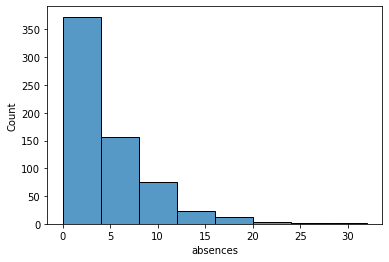

In [22]:
# absences histogram

sns.histplot(data=data_df, x="absences", bins=8);

#combine both histograms

# Task 4. Scatter plot

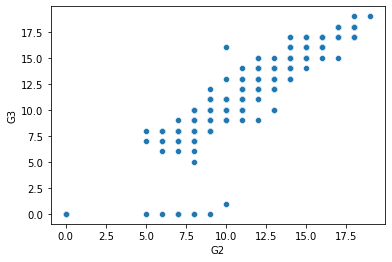

In [26]:
sns.scatterplot(data=data_df, x="G2", y="G3");

# add title


In [46]:
data_df[["G2","G3"]].corr(method="pearson")

# Find a way to extract the number automatically



,G2,G3
G2,1.000000,0.918548
G3,0.918548,1.000000


In [51]:
corr_g2g3 = data_df[["G2","G3"]].corr(method="pearson").iloc[1,0]
print("The correllation between G2 and G3: {:.3f}".format(corr_g2g3))

The correllation between G2 and G3: 0.919


## Task 5. Correlation

In [52]:
data_df[["studytime", "traveltime", "age", "absences", "health", "Walc", "Dalc", "famrel", "goout", "G2", "G1"]].corr(method="pearson")


,studytime,traveltime,age,absences,health,Walc,Dalc,famrel,goout,G2,G1
studytime,1.000000,-0.063154,-0.008415,-0.118389,-0.056433,-0.214925,-0.137585,-0.004127,-0.075442,0.240498,0.260875
traveltime,-0.063154,1.000000,0.034490,-0.008149,-0.048261,0.057007,0.092824,-0.009521,0.057454,-0.154489,-0.154120
age,-0.008415,0.034490,1.000000,0.149998,-0.008750,0.086357,0.134768,-0.020559,0.112805,-0.107119,-0.174322
absences,-0.118389,-0.008149,0.149998,1.000000,-0.030235,0.156373,0.172952,-0.089534,0.085374,-0.124745,-0.147149
health,-0.056433,-0.048261,-0.008750,-0.030235,1.000000,0.114988,0.059067,0.109559,-0.015741,-0.082179,-0.051647
Walc,-0.214925,0.057007,0.086357,0.156373,0.114988,1.000000,0.616561,-0.093511,0.388680,-0.164852,-0.155649
Dalc,-0.137585,0.092824,0.134768,0.172952,0.059067,0.616561,1.000000,-0.075767,0.245126,-0.189480,-0.195171
famrel,-0.004127,-0.009521,-0.020559,-0.089534,0.109559,-0.093511,-0.075767,1.000000,0.089707,0.089588,0.048795
goout,-0.075442,0.057454,0.112805,0.085374,-0.015741,0.388680,0.245126,0.089707,1.000000,-0.079469,-0.074053
G2,0.240498,-0.154489,-0.107119,-0.124745,-0.082179,-0.164852,-0.189480,0.089588,-0.079469,1.000000,0.864982


In [54]:
data_df[["studytime", "traveltime", "age", "absences", "health", "Walc", "Dalc", "famrel", "goout", "G2", "G1"]].corr(method="pearson").iloc[10]

#automatically display top 5 
#put all in list, arrange and display top 5


studytime     0.260875
traveltime   -0.154120
age          -0.174322
absences     -0.147149
health       -0.051647
Walc         -0.155649
Dalc         -0.195171
famrel        0.048795
goout        -0.074053
G2            0.864982
G1            1.000000
Name: G1, dtype: float64

# Task 6. $\chi^2$-test



In [56]:
#are attributes internet and romantic independant?

#making a crosstable

int_rom_crosstab = pd.crosstab(data_df["internet"], data_df["romantic"])
int_rom_crosstab

romantic,no,yes
internet,,
no,100,51
yes,310,188


In [59]:
from scipy import stats

int_rom_chi2, int_rom_p, int_rom_dof, _ = stats.chi2_contingency((int_rom_crosstab))
print("Chi^2:{:.5f}\nP:{:.5f}\nDoF:{}".format(int_rom_chi2,int_rom_p,int_rom_dof))

# wtf does this mean tho lol
# at 0.01,6.64 is needed to be significant so its not significant? not independant?



Chi^2:0.62577
P:0.42891
DoF:1


In [61]:
sex_rom_crosstab = pd.crosstab(data_df["sex"],data_df["romantic"])
sex_rom_crosstab

romantic,no,yes
sex,,
F,225,158
M,185,81


In [62]:
sex_rom_chi2, sex_rom_p, sex_rom_dof, _ = stats.chi2_contingency((sex_rom_crosstab))
print("Chi^2:{:.5f}\nP:{:.5f}\nDoF:{}".format(sex_rom_chi2,sex_rom_p,sex_rom_dof))



Chi^2:7.41593
P:0.00646
DoF:1


## Task 7. Normalization

In [70]:

empty = []
scaled_df = pd.DataFrame(empty, columns=['A'])
scaled_df

,A


In [65]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

data_scaled_df["studytime_minmax_scaled"] = scaler.fit_transform(data_df[["studytime"]])
data_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,studytime_minmax_scaled
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,0.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,0.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,0.333333


## Task 8. PCA

## Task 9. Missing values

reloading the dataset

In [ ]:
data_df = pd.read_csv(data_file, sep=';')